TECNICATURA EN CIENCIA DE DATOS E INTELIGENCIA ARTIFICIAL

Profesor: Ing. Narciso Pérez

PROYECTO GRUPAL INCIDENTES VIALES

Grupo formado por:

--> Arévalo, Iván;

--> Giovine, Carina;

--> Gómez, Octavio;

--> Herrero Rivero, Eduardo.

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import plotly.io as pio
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/mede_victimas_inci.csv", sep=";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.shape

(235843, 19)

In [5]:
#Primeros elementos del dataframe
df.head()

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Año,Radicado,Latitud,Longitud,Comuna,Barrio
0,Heridos,1/1/2014,00:15:00,Otro,CR 49 CL 72,M,17,Motociclista,Ene,Mié,1,0,oct-19,2014,1423940,"6,26691466","-75,5590994",04 - Aranjuez,Manrique Central No. 1
1,Heridos,1/1/2014,00:30:00,Atropello,CR 46 CL 98,M,20,Motociclista,Ene,Mié,1,0,20 - 29,2014,1423921,"6,289353458","-75,55329197",01 - Popular,Moscú No. 2
2,Heridos,1/1/2014,00:30:00,Atropello,CR 46 CL 98,F,18,Peatón,Ene,Mié,1,0,oct-19,2014,1423921,"6,289353458","-75,55329197",01 - Popular,Moscú No. 2
3,Heridos,1/1/2014,00:37:00,Atropello,CL 32 CR 84,M,19,Motociclista,Ene,Mié,1,0,oct-19,2014,1423849,"6,234327372","-75,60761079",16 - Belén,Las Mercedes
4,Heridos,1/1/2014,00:37:00,Atropello,CL 32 CR 84,M,39,Peatón,Ene,Mié,1,0,30 - 39,2014,1423849,"6,234327372","-75,60761079",16 - Belén,Las Mercedes


In [ ]:
#últimos 5 datos del dataset
df.tail(5)

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Año,Radicado,Latitud,Longitud,Comuna,Barrio
235838,Heridos,30/9/2021,22:00:00,Otro,CL 54 CR 9 A,M,32,Motociclista,Sep,Jue,30,22,30 - 39,2021,1764135,"-75,53631071","6,23426695",08 - Villa Hermosa,Las Estancias
235839,Heridos,30/9/2021,22:00:00,Otro,CL 54 CR 9 A,F,29,Acompañante de motocicleta,Sep,Jue,30,22,20 - 29,2021,1764135,"-75,53631071","6,23426695",08 - Villa Hermosa,Las Estancias
235840,Heridos,30/9/2021,22:00:00,Caida Ocupante,CL 81 CR 39,M,41,Acompañante de motocicleta,Sep,Jue,30,22,40 - 49,2021,1763968,"-75,54867484","6,272697",03 - Manrique,Santa Inés
235841,Heridos,30/9/2021,23:00:00,Atropello,CR 63 CL 32,F,51,Peatón,Sep,Jue,30,23,50 - 59,2021,1764133,Sin Inf,Sin Inf,Sin Inf,NaN
235842,Heridos,30/9/2021,23:00:00,Otro,CR 107 CL 65,M,23,Motociclista,Sep,Jue,30,23,20 - 29,2021,1763946,Sin Inf,Sin Inf,Sin Inf,NaN


In [ ]:
df.dtypes

Gravedad_victima       object
Fecha_incidente        object
Hora_incidente         object
Clase_incidente        object
Direccion_incidente    object
Sexo                   object
Edad                   object
Condicion              object
Mes                    object
Dia                    object
Num_dia                 int64
Hora                   object
Grupo_edad             object
Año                     int64
Radicado               object
Latitud                object
Longitud               object
Comuna                 object
Barrio                 object
dtype: object

In [ ]:
# Informacion general de los datos de cada cloumna
# Indica el numero de filas del dataset
# Muestra el numero de datos No Nulos por columna (valores validos)
# Tipo de dato de cada columna
# Tamaño total del dataset
df.info

<bound method DataFrame.info of        Gravedad_victima Fecha_incidente Hora_incidente Clase_incidente  \
0               Heridos        1/1/2014       00:15:00            Otro   
1               Heridos        1/1/2014       00:30:00       Atropello   
2               Heridos        1/1/2014       00:30:00       Atropello   
3               Heridos        1/1/2014       00:37:00       Atropello   
4               Heridos        1/1/2014       00:37:00       Atropello   
...                 ...             ...            ...             ...   
235838          Heridos       30/9/2021       22:00:00            Otro   
235839          Heridos       30/9/2021       22:00:00            Otro   
235840          Heridos       30/9/2021       22:00:00  Caida Ocupante   
235841          Heridos       30/9/2021       23:00:00       Atropello   
235842          Heridos       30/9/2021       23:00:00            Otro   

       Direccion_incidente Sexo Edad                   Condicion  Mes  Dia  \
0

In [ ]:
#con count() conozco cuantos registros tengo por columna
df.count()

Gravedad_victima       235843
Fecha_incidente        235843
Hora_incidente         235843
Clase_incidente        235843
Direccion_incidente    235831
Sexo                   235843
Edad                   235335
Condicion              235843
Mes                    235843
Dia                    235843
Num_dia                235843
Hora                   235843
Grupo_edad             235843
Año                    235843
Radicado               235838
Latitud                235843
Longitud               235843
Comuna                 235843
Barrio                 235225
dtype: int64

In [ ]:
# Realizamos una exploracion de nuestro data frame verificando por cada variable 
# sus valores unicos
print('\n Gravedad_victima = {}'.format(df.Gravedad_victima.unique()))
print('\n Fecha_incidente = {}'.format(df.Fecha_incidente.unique()))
print('\n Hora_incidente = {}'.format(df.Hora_incidente.unique()))
print('\n Clase_incidente = {}'.format(df.Clase_incidente.unique()))
print('\n Direccion_incidente = {}'.format(df.Direccion_incidente.unique()))
print('\n Sexo = {}'.format(df.Sexo.unique()))
print('\n Edad = {}'.format(df.Edad.unique()))
print('\n Condicion = {}'.format(df.Condicion.unique()))
print('\n Mes = {}'.format(df.Mes.unique()))
print('\n Dia = {}'.format(df.Dia.unique()))
print('\n Num_dia = {}'.format(df.Num_dia.unique()))
print('\n Hora = {}'.format(df.Hora.unique()))
print('\n Grupo_edad = {}'.format(df.Grupo_edad.unique()))
print('\n Año = {}'.format(df.Año.unique()))
print('\n Radicado = {}'.format(df.Radicado.unique()))
print('\n Latitud = {}'.format(df.Latitud.unique()))
print('\n Longitud = {}'.format(df.Longitud.unique()))
print('\n Comuna = {}'.format(df.Comuna.unique()))
print('\n Barrio = {}'.format(df.Barrio.unique()[:10]))


 Gravedad_victima = ['Heridos' 'Muertos']

 Fecha_incidente = ['1/1/2014' '2/1/2014' '3/1/2014' ... '28/9/2021' '29/9/2021' '30/9/2021']

 Hora_incidente = ['00:15:00' '00:30:00' '00:37:00' ... '01:18:00' '03:53:00' '02:07:00']

 Clase_incidente = ['Otro' 'Atropello' 'Choque' 'Caida Ocupante' 'Volcamiento' 'Incendio']

 Direccion_incidente = ['CR 49 CL 72' 'CR 46 CL 98' 'CL 32 CR 84' ... 'CR 49 DG 50'
 'DG 75 B CL 76' 'CL 28 A CR 65 A']

 Sexo = ['M' 'F' 'Sin Inf' 'Sin inf']

 Edad = ['17' '20' '18' '19' '39' '44' '7' '35' '51' '30' 'Sin Inf' '34' '26' '29'
 '27' '32' '33' '24' '23' '36' '25' '28' '52' '38' '61' '58' '22' '73'
 '21' '5' '31' '4' '14' '63' '50' '49' '59' '54' '85' '6' '46' '62' '15'
 '41' '16' '2' '47' '37' '83' '55' '13' '65' '3' '72' '57' '9' '45' '12'
 '82' '43' '1' '40' '53' '56' '0' '8' '76' '71' '42' '11' '64' '67' '70'
 '66' '77' '48' '78' '68' '74' '10' '60' '79' '75' '69' '91' '81' '88'
 '89' '86' '90' '84' '80' '87' '92' '98' '95' '94' '97' '93' '96' '118'
 '

In [ ]:
# Numero de datos faltantes por columna
df.isnull().sum()

Gravedad_victima         0
Fecha_incidente          0
Hora_incidente           0
Clase_incidente          0
Direccion_incidente     12
Sexo                     0
Edad                   508
Condicion                0
Mes                      0
Dia                      0
Num_dia                  0
Hora                     0
Grupo_edad               0
Año                      0
Radicado                 5
Latitud                  0
Longitud                 0
Comuna                   0
Barrio                 618
dtype: int64

In [ ]:
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :") 
  
duplicate

Duplicate Rows :


,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Año,Radicado,Latitud,Longitud,Comuna,Barrio
16722,Heridos,14/7/2014,11:10:00,Choque,CR 63 CL 57,M,Sin Inf,Conductor,Jul,Lun,14,11,Sin Inf,2014,1448924,"6,173157779","-75,64456948",80 - Corregimiento de San Antonio de Prado,Cabecera San Antonio de Prado
19076,Heridos,9/8/2014,07:45:00,Choque,CL 77 CR 56 A,F,33,Conductor,Ago,Sáb,9,7,30 - 39,2014,1452440,"6,275150551","-75,56812553",04 - Aranjuez,Moravia
30970,Heridos,25/12/2014,22:00:00,Choque,CL 48 D CR 48 A,M,22,Motociclista,Dic,Jue,25,22,20 - 29,2014,1469911,"6,247394491","-75,56735166",10 - La Candelaria,La Candelaria
37820,Heridos,15/3/2015,02:30:00,Choque,CL 18 CR 93,M,20,Motociclista,Mar,Dom,15,2,20 - 29,2015,1479668,"6,222449537","-75,61666884",70 - Corregimiento de Altavista,Altavista Sector Central
42997,Heridos,12/5/2015,14:00:00,Atropello,CL 53 CR 54 A,M,45,Peatón,May,Mar,12,14,40 - 49,2015,1487250,"6,253487028","-75,57026176",10 - La Candelaria,Estación Villa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233994,Heridos,11/9/2021,09:28:00,Choque,CL 60 CR 144,M,121,Pasajero,Sep,Sáb,11,9,Sin Inf,2021,1761302,Sin Inf,Sin Inf,Sin Inf,NaN
234804,Heridos,19/9/2021,20:00:00,Atropello,CL 18 CR 103,F,10,Peatón,Sep,Dom,19,20,oct-19,2021,1762776,"-75,62500521","6,22331759",70 - Corregimiento de Altavista,Suburbano Altavista
235016,Heridos,21/9/2021,22:35:00,Choque,CR 36 A CL 51,F,53,Pasajero,Sep,Mar,21,22,50 - 59,2021,1762632,"-75,55757587","6,24433108",09 - Buenos Aires,Barrio Caicedo
235038,Heridos,22/9/2021,06:40:00,Choque,DG 80 CL 78,F,25,Pasajero,Sep,Mié,22,6,20 - 29,2021,1762890,"-75,58625787","6,2814932",07 - Robledo,Bosques de San Pablo


In [ ]:
# valores unicos de la columna Gravedad_victima
df['Gravedad_victima'].unique()


array(['Heridos', 'Muertos'], dtype=object)

In [ ]:
# valores unicos de la columna Clase_incidente
df['Clase_incidente'].unique()

array(['Otro', 'Atropello', 'Choque', 'Caida Ocupante', 'Volcamiento',
       'Incendio'], dtype=object)

In [ ]:
# valores unicos de la columna Direccion_incidente
df['Direccion_incidente'].unique()

array(['CR 49 CL 72', 'CR 46 CL 98', 'CL 32 CR 84', ..., 'CR 49 DG 50',
       'DG 75 B CL 76', 'CL 28 A CR 65 A'], dtype=object)

Podemos ver que existen muchas de las variables que no se corresponden al tipo de dato especificado:

Fecha_incidente Hora_incidente

Edad

Latitud

Longitud

In [ ]:
# Convertir a tipo fecha  
print('\n Fecha_incidente = {}'.format(df.Fecha_incidente.unique()))
print('\n Hora_incidente = {}'.format(df.Hora_incidente.unique()))
# En este caso tenemos que corregir el mes 'Sep' y pasar todos los registros a 'Sept'
print('\n Mes = {}'.format(df.Mes.unique()))
print('\n Dia = {}'.format(df.Dia.unique()))
# En este caso tenemos que corregir el ''oct-19' y pasar todos los registros a '10-19'
print('\n Grupo_edad = {}'.format(df.Grupo_edad.unique()))


 Fecha_incidente = ['1/1/2014' '2/1/2014' '3/1/2014' ... '28/9/2021' '29/9/2021' '30/9/2021']

 Hora_incidente = ['00:15:00' '00:30:00' '00:37:00' ... '01:18:00' '03:53:00' '02:07:00']

 Mes = ['Ene' 'Feb' 'Mar' 'Abr' 'May' 'Jun' 'Jul' 'Ago' 'Sept' 'Oct' 'Nov' 'Dic'
 'Sep']

 Dia = ['Mié' 'Jue' 'Vie' 'Sáb' 'Dom' 'Lun' 'Mar']

 Grupo_edad = ['oct-19' '20 - 29' '30 - 39' '40 - 49' '0 - 9' '50 - 59' 'Sin Inf'
 '60 - 69' '70 - 79' '80 o más']


In [ ]:
df.dtypes

Gravedad_victima       object
Fecha_incidente        object
Hora_incidente         object
Clase_incidente        object
Direccion_incidente    object
Sexo                   object
Edad                   object
Condicion              object
Mes                    object
Dia                    object
Num_dia                 int64
Hora                   object
Grupo_edad             object
Año                     int64
Radicado               object
Latitud                object
Longitud               object
Comuna                 object
Barrio                 object
dtype: object



---


En las siguientes líneas de código, copiamos el dataset a otro para realizar los cambios en una copia y no ejecutar en el dataset original.

In [ ]:
dfinal = df.copy()

In [ ]:
dfinal.head()

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Año,Radicado,Latitud,Longitud,Comuna,Barrio
0,Heridos,1/1/2014,00:15:00,Otro,CR 49 CL 72,M,17,Motociclista,Ene,Mié,1,0,oct-19,2014,1423940,"6,26691466","-75,5590994",04 - Aranjuez,Manrique Central No. 1
1,Heridos,1/1/2014,00:30:00,Atropello,CR 46 CL 98,M,20,Motociclista,Ene,Mié,1,0,20 - 29,2014,1423921,"6,289353458","-75,55329197",01 - Popular,Moscú No. 2
2,Heridos,1/1/2014,00:30:00,Atropello,CR 46 CL 98,F,18,Peatón,Ene,Mié,1,0,oct-19,2014,1423921,"6,289353458","-75,55329197",01 - Popular,Moscú No. 2
3,Heridos,1/1/2014,00:37:00,Atropello,CL 32 CR 84,M,19,Motociclista,Ene,Mié,1,0,oct-19,2014,1423849,"6,234327372","-75,60761079",16 - Belén,Las Mercedes
4,Heridos,1/1/2014,00:37:00,Atropello,CL 32 CR 84,M,39,Peatón,Ene,Mié,1,0,30 - 39,2014,1423849,"6,234327372","-75,60761079",16 - Belén,Las Mercedes


In [ ]:
#estandarizacion de valores 'Acompañante de motocicleta'],'Acompañante de Motocicleta'
dfinal['Condicion']= dfinal['Condicion'].replace(['Acompañante de motocicleta'],'Acompañante de Motocicleta')

In [ ]:
# valores unicos de la columna Condicion
dfinal['Condicion'].unique()

array(['Motociclista', 'Peatón', 'Acompañante de Motocicleta',
       'Conductor', 'Ciclista', 'Pasajero'], dtype=object)

In [ ]:
# comparo los cambios de valores con el data set original
df['Condicion'].unique()

array(['Motociclista', 'Peatón', 'Acompañante de Motocicleta',
       'Conductor', 'Ciclista', 'Pasajero', 'Acompañante de motocicleta'],
      dtype=object)

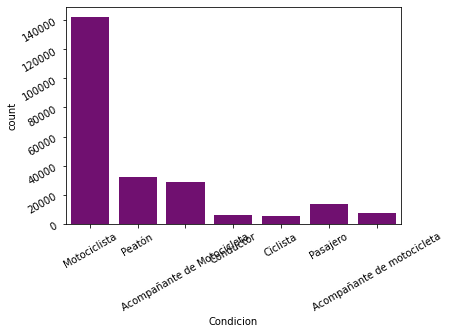

In [ ]:
#figura en el dataset original
plt.figure()
seaborn.countplot(x=df.Condicion, color='Purple')
plt.tick_params(labelrotation=30)

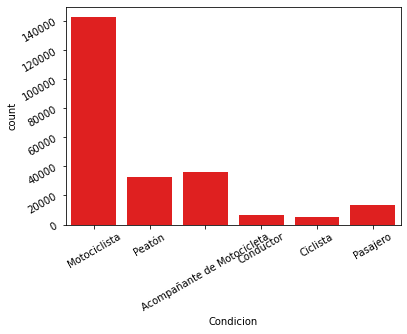

In [ ]:
#figura en el dataset copia con la unificacion de los valores
plt.figure()
seaborn.countplot(x=dfinal.Condicion, color='red')
plt.tick_params(labelrotation=30)

In [ ]:
dfinal['Sexo'].unique()

array(['M', 'F', 'Sin Inf', 'Sin inf'], dtype=object)

In [ ]:
dfinal['Sexo']= dfinal['Sexo'].replace(['Sin inf'],'Sin Inf')

In [ ]:
dfinal['Sexo'].unique()

array(['M', 'F', 'Sin Inf'], dtype=object)

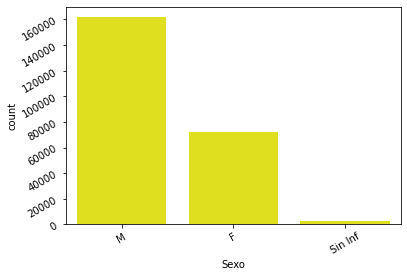

In [ ]:
plt.figure()
seaborn.countplot(x=dfinal.Sexo, color='yellow')
plt.tick_params(labelrotation=30)

In [ ]:
dfinal['Mes']= dfinal['Mes'].replace(['Sep'],'Sept')

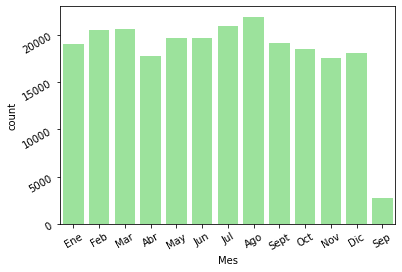

In [ ]:
#gráfica que muestra como estaban los datos en el dataset original
plt.figure()
seaborn.countplot(x=df.Mes, color='lightgreen')
plt.tick_params(labelrotation=30)

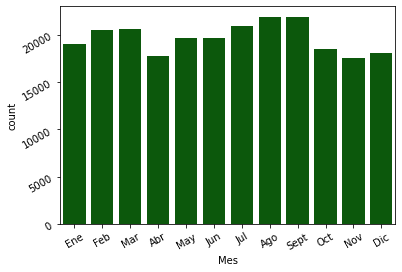

In [ ]:
#gráfica que muestra como quedaron lso datos luego de unificar
plt.figure()
seaborn.countplot(x=dfinal.Mes, color='darkgreen')
plt.tick_params(labelrotation=30)

In [ ]:
# Convertimos de object a datetime
dfinal['Fecha_incidente'] = pd.to_datetime(dfinal.Fecha_incidente, dayfirst=True, format='%d/%m/%Y')

In [ ]:
#corregir el 'oct-19' y pasar todos los registros a '10-19'
dfinal.Grupo_edad = dfinal.Grupo_edad.replace(['oct-19'], '10 - 19')
print('Grupo_edad = {}'.format(dfinal.Grupo_edad.unique()))

Grupo_edad = ['10 - 19' '20 - 29' '30 - 39' '40 - 49' '0 - 9' '50 - 59' 'Sin Inf'
 '60 - 69' '70 - 79' '80 o más']


In [ ]:
# En este caso tenemos que corregir el 'Sin Inf' y pasar todos los registros a nan
# para que los considere nulos.  Dejamos el 0 porque puede ser una edad antes del año 
# pero para no perder los registros que tienen un rango de edad los cambiamos a un 
# promedio entero. Convertir a numérico entero
dfinal.Edad = dfinal.Edad.replace(['Sin Inf'], np.nan)

dfinal.Edad = dfinal.Edad.replace(['30-35'], '33')
dfinal.Edad = dfinal.Edad.replace(['45-50'], '44')
dfinal.Edad = dfinal.Edad.replace(['30 - 35'], '33')
dfinal.Edad = dfinal.Edad.replace(['20 - 29'], '25')

# errors='coerce' tranforma todos los errores en NaN y evito generar las correcciones anteriores
dfinal.Edad = pd.to_numeric(dfinal.Edad, downcast='integer')
print('Edad = {}'.format(dfinal.Edad.unique()))

Edad = [ 17.  20.  18.  19.  39.  44.   7.  35.  51.  30.  nan  34.  26.  29.
  27.  32.  33.  24.  23.  36.  25.  28.  52.  38.  61.  58.  22.  73.
  21.   5.  31.   4.  14.  63.  50.  49.  59.  54.  85.   6.  46.  62.
  15.  41.  16.   2.  47.  37.  83.  55.  13.  65.   3.  72.  57.   9.
  45.  12.  82.  43.   1.  40.  53.  56.   0.   8.  76.  71.  42.  11.
  64.  67.  70.  66.  77.  48.  78.  68.  74.  10.  60.  79.  75.  69.
  91.  81.  88.  89.  86.  90.  84.  80.  87.  92.  98.  95.  94.  97.
  93.  96. 118. 106. 108. 107. 104. 105. 119. 109. 137. 102.  99. 110.
 120. 100. 121. 111.]


In [ ]:
# El dia no puede ser 0 por lo tanto lo ponemos como valor nulo para analizarlo con las funciones
# de pandas despues analizamos que hacemos
dfinal.Num_dia = dfinal.Num_dia.replace([0], np.nan)
print('Num_dia = {}'.format(dfinal.Num_dia.unique()))

Num_dia = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. nan]


In [ ]:
# En este caso tenemos que corregir el 'Sin Inf' y pasar todos los registros a nan
# para que los considere nulos, el 0 es un valor válido, equivale a 24hs. Convertir a numérico entero
dfinal.Hora = dfinal.Hora.replace(['Sin Inf'], np.nan)

dfinal.Hora = pd.to_numeric(dfinal.Hora, downcast='integer')
print('\n Hora = {}'.format(dfinal.Hora.unique()))


 Hora = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. nan]


In [ ]:
# Convertir a numérico entero y los errores los conviento en Nan directamente 
dfinal.Radicado = pd.to_numeric(dfinal.Radicado, downcast='integer', errors='coerce')
print('\n Radicado = {}'.format(dfinal.Radicado.unique()))


 Radicado = [1423940. 1423921. 1423849. ... 1763968. 1764133. 1763946.]


In [ ]:
# En este caso tenemos que corregir el 'Sin Inf' y pasar todos los registros a '0' o nan
# para que los considere nulos. Convertir a numerico float
dfinal.Latitud = dfinal.Latitud.replace(['Sin Inf'], np.nan)

dfinal.Latitud = dfinal.Latitud.str.replace(',','.').astype(np.float64)
print('\n Latitud = {}'.format(dfinal.Latitud.unique()))


 Latitud = [  6.26691466   6.28935346   6.23432737 ... -75.57582422 -75.53631071
 -75.54867484]


In [ ]:
# En este caso tenemos que corregir el 'Sin Inf' y pasar todos los registros a '0' o nan
# para que los considere nulos. Convertir a numerico float
dfinal.Longitud = dfinal.Longitud.replace(['Sin Inf'], np.nan)

dfinal.Longitud = dfinal.Longitud.str.replace(',','.').astype(np.float64)
print('\n Longitud = {}'.format(dfinal.Longitud.unique()))


 Longitud = [-75.5590994  -75.55329197 -75.60761079 ...   6.2178952    6.23426695
   6.272697  ]


In [ ]:
# Despues de las correciones sacamos nuevamente la informacion del data frame y
# vemos que tenemos ahora varias columnas numericas 
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235843 entries, 0 to 235842
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Gravedad_victima     235843 non-null  object        
 1   Fecha_incidente      235843 non-null  datetime64[ns]
 2   Hora_incidente       235843 non-null  object        
 3   Clase_incidente      235843 non-null  object        
 4   Direccion_incidente  235831 non-null  object        
 5   Sexo                 235843 non-null  object        
 6   Edad                 233429 non-null  float64       
 7   Condicion            235843 non-null  object        
 8   Mes                  235843 non-null  object        
 9   Dia                  235843 non-null  object        
 10  Num_dia              235842 non-null  float64       
 11  Hora                 235836 non-null  float64       
 12  Grupo_edad           235843 non-null  object        
 13  Año           

VER PORQUE EN LA LÍNEA DE ABAJO AL CONSULTAR LOS DATOS QUEDAN COMO FLOAT (EDAD,  HORA, RADICADO.. en el código se pasan a integer y al consultar el tipo quedan en float!) 
REVISAR

In [ ]:
dfinal.dtypes

Gravedad_victima               object
Fecha_incidente        datetime64[ns]
Hora_incidente                 object
Clase_incidente                object
Direccion_incidente            object
Sexo                           object
Edad                          float64
Condicion                      object
Mes                            object
Dia                            object
Num_dia                       float64
Hora                          float64
Grupo_edad                     object
Año                             int64
Radicado                      float64
Latitud                       float64
Longitud                      float64
Comuna                         object
Barrio                         object
dtype: object

Aálisis y Visualización

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

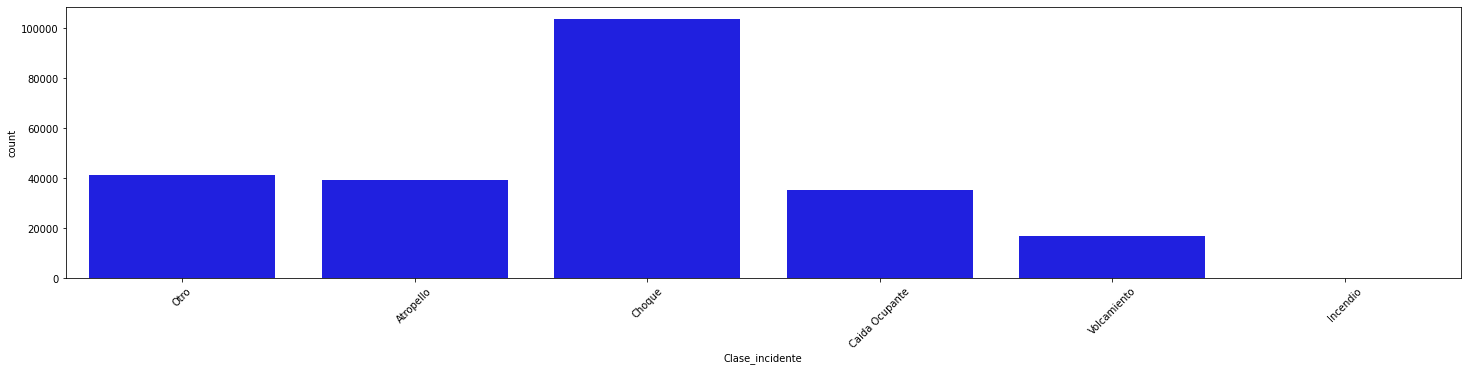

In [ ]:
# Graficamente podemos verlo de la siguiente manera
fig = plt.figure(figsize=(25,5))
sns.countplot(data=dfinal, x='Clase_incidente', color='BLUE')
plt.xticks(rotation=45)

Analicemos la frecuencia de incidentes viales por dia, mes y por año.

In [ ]:
# Como referencia saco los templates de plotly.io que puedo usar considerando que llamamos a la libreria como pio
pio.templates


Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [ ]:
#FRECUENCIA POR DIA
agr_df_dia = dfinal.groupby(['Dia'])['Clase_incidente'].count(). reset_index()
agr_df_dia = agr_df_dia.rename(columns={'Clase_incidente':'Cantidad_Incidentes'})
agr_df_dia

,Dia,Cantidad_Incidentes
0,Dom,28570
1,Jue,34568
2,Lun,34078
3,Mar,34750
4,Mié,34914
5,Sáb,34107
6,Vie,34856


In [ ]:
fig = px.bar(agr_df_dia, x='Dia', y='Cantidad_Incidentes',
             color='Cantidad_Incidentes',
             template='ggplot2',
             labels={'Cantidad_Incidentes':'Cantidad de Incidentes', 'Dia':'Dia de la Semana'},
             title='Cantidad de Accidentes registrado por Dia de la Semana',
             height=400)
fig.show()

In [ ]:
# Analisis Detallado
df_mask1 = pd.crosstab(index = dfinal['Clase_incidente'],
            columns=dfinal['Dia'], margins=True)
df_mask1

Dia,Dom,Jue,Lun,Mar,Mié,Sáb,Vie,All
Clase_incidente,,,,,,,,
Atropello,5109,5625,5259,5622,5686,6311,5843,39455
Caida Ocupante,4287,5274,5429,5228,5008,4726,5146,35098
Choque,12308,14845,14820,15186,15523,15265,15436,103383
Incendio,3,5,8,2,2,1,3,24
Otro,4913,6347,6093,6195,6171,5414,6029,41162
Volcamiento,1950,2472,2469,2517,2524,2390,2399,16721
All,28570,34568,34078,34750,34914,34107,34856,235843


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

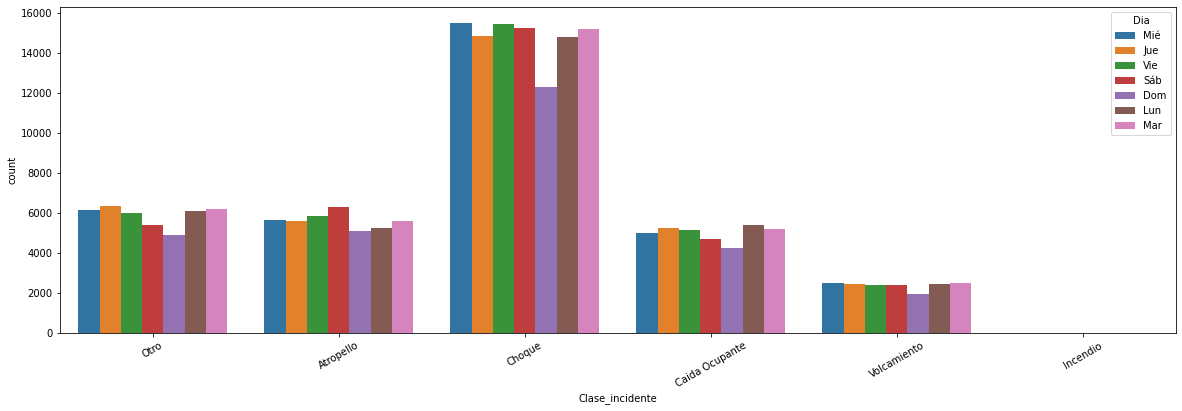

In [ ]:
fig = plt.figure(figsize=(20,6))
sns.countplot(dfinal.Clase_incidente,  hue=dfinal.Dia)
plt.xticks(rotation=30)

FRECUENCIA POR MES

In [ ]:
# Analisis General
agr_df_mes = dfinal.groupby(['Mes'])['Clase_incidente'].count(). reset_index()#.sort_values(by='Clase_incidente', ascending=False)
agr_df_mes = agr_df_mes.rename(columns={'Clase_incidente':'Cantidad_Incidentes'})
agr_df_mes

,Mes,Cantidad_Incidentes
0,Abr,17713
1,Ago,21893
2,Dic,18115
3,Ene,18981
4,Feb,20513
5,Jul,20951
6,Jun,19612
7,Mar,20560
8,May,19649
9,Nov,17519


In [ ]:
fig = px.bar(agr_df_mes, x='Mes', y='Cantidad_Incidentes',
             color='Cantidad_Incidentes',
             template='ggplot2',
             labels={'Cantidad_Incidentes':'Cantidad de Incidentes', 'Mes':'Mes del Año'},
             title='Cantidad de Accidentes registrado por Mes del Año',
             height=400)
fig.show()

FRECUENCIA POR AÑO

In [ ]:
# Analisis General
agr_df_año = dfinal.groupby(['Año'])['Clase_incidente'].count(). reset_index()
agr_df_año = agr_df_año.rename(columns={'Clase_incidente':'Cantidad_Incidentes'})
agr_df_año

,Año,Cantidad_Incidentes
0,2014,31411
1,2015,32622
2,2016,33791
3,2017,31658
4,2018,29082
5,2019,31876
6,2020,23676
7,2021,21727


In [ ]:
fig = px.bar(agr_df_año, x='Año', y='Cantidad_Incidentes',
             color='Cantidad_Incidentes',
             template='ggplot2',
             labels={'Cantidad_Incidentes':'Cantidad de Incidentes', 'Año':'Año'},
             title='Cantidad de Accidentes registrado por Año',
             height=400)
fig.show()

Aquí tenemos en cuanta que el dataset tiene datos hasta el 30 de septiembre de 2021. Por eso vale aclarar que el año 2021 tiene faltante de datos para la comparación de años.

Se analizan los incidentes por Comuna

In [ ]:
# Como las comunas son 22 podemos hacer un analisis general de toda la poblacion
agr_df_comuna = pd.crosstab(index = dfinal['Comuna'],
                columns=dfinal['Clase_incidente'], margins=True)
agr_df_comuna

Clase_incidente,Atropello,Caida Ocupante,Choque,Incendio,Otro,Volcamiento,All
Comuna,,,,,,,
01 - Popular,1520,747,1045,1,770,365,4448
02 - Santa Cruz,1191,544,1157,0,585,273,3750
03 - Manrique,2390,1419,3342,1,1545,724,9421
04 - Aranjuez,2852,2052,6398,2,2326,904,14534
05 - Castilla,2850,3551,10761,0,4173,1548,22883
06 - Doce de Octubre,1921,1787,2504,0,1499,478,8189
07 - Robledo,2158,3291,6696,0,3445,1103,16693
08 - Villa Hermosa,1647,1248,2892,1,1295,630,7713
09 - Buenos Aires,1514,1351,3921,0,1837,809,9432


Como la Población general de Barrios son aproximadamente 450, el análisis no puede considerar la toralidad de Barrios por lo tanto optamos por tomar un valor determinado de los mismos considerando de aquellos que tuvieron mayor cantidad de Incidentes. Se eliminaron datos considerados nulos que podían afectar el análisis.

In [ ]:
# Defino cuantos barrios voy a considerar de acuerdo a los que tienen mayor frecuencia de Incidentes
top = 20
# Armo un data frame con los Barrios ordena de mayor a menor por la cantidad de Incidentes 
select_barrios_df = dfinal.Barrio.value_counts().reset_index()\
    .rename(columns={'index': 'Barrios', 'Barrio': 'Frecuencia'})
# Dejo en ese data frame solo los barrios que defino con la variable top
select_barrios_df = select_barrios_df[:top]
select_barrios_df

,Barrios,Frecuencia
0,Sin Inf,21264
1,Caribe,3917
2,La Candelaria,3799
3,Perpetuo Socorro,3759
4,Campo Amor,3608
5,Cabecera San Antonio de Prado,3318
6,Santa Fé,3289
7,Castilla,3185
8,Barrio Colón,2830
9,Los Conquistadores,2800


In [ ]:
#HACER MAPA DE CALOR PARA VER LA RELACION ENTE LA VARIABLES, CAMBIAR LOS NOMBRES DE LOS DATASET Y VER LOS VALORES

#correlation_matrix=bos.corr().round(2)
#sns.heatmap(data=correlation_matrix, annot=True)

El coeficiente de correlación oscila entre -1 y 1. Si el valor se acerca a 1, significa que existe una fuerte correlación positiva entre las dos variables. Cuando se acerca a -1, las variables tienen una fuerte correlación negativa.

In [ ]:
# Analisamos si tenemos registros nulos o NAN y vemos que aparecen este tipo
# de datos sobre todo en las columnas que corregimos y convertimos a numericas
dfinal.isnull().sum()

Gravedad_victima           0
Fecha_incidente            0
Hora_incidente             0
Clase_incidente            0
Direccion_incidente       12
Sexo                       0
Edad                    2414
Condicion                  0
Mes                        0
Dia                        0
Num_dia                    1
Hora                       7
Grupo_edad                 0
Año                        0
Radicado                  49
Latitud                20845
Longitud               20845
Comuna                     0
Barrio                   618
dtype: int64

Guardo el dataFrame dfinal en un csv para seguir los análisis de los ciclos posteriores

In [ ]:
dfinal.to_csv('dfinal.csv', index=False)

In [ ]:
df1 = pd.read_csv('dfinal.csv')
df1

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Año,Radicado,Latitud,Longitud,Comuna,Barrio
0,Heridos,2014-01-01,00:15:00,Otro,CR 49 CL 72,M,17.0,Motociclista,Ene,Mié,1.0,0.0,10 - 19,2014,1423940.0,6.266915,-75.559099,04 - Aranjuez,Manrique Central No. 1
1,Heridos,2014-01-01,00:30:00,Atropello,CR 46 CL 98,M,20.0,Motociclista,Ene,Mié,1.0,0.0,20 - 29,2014,1423921.0,6.289353,-75.553292,01 - Popular,Moscú No. 2
2,Heridos,2014-01-01,00:30:00,Atropello,CR 46 CL 98,F,18.0,Peatón,Ene,Mié,1.0,0.0,10 - 19,2014,1423921.0,6.289353,-75.553292,01 - Popular,Moscú No. 2
3,Heridos,2014-01-01,00:37:00,Atropello,CL 32 CR 84,M,19.0,Motociclista,Ene,Mié,1.0,0.0,10 - 19,2014,1423849.0,6.234327,-75.607611,16 - Belén,Las Mercedes
4,Heridos,2014-01-01,00:37:00,Atropello,CL 32 CR 84,M,39.0,Peatón,Ene,Mié,1.0,0.0,30 - 39,2014,1423849.0,6.234327,-75.607611,16 - Belén,Las Mercedes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235838,Heridos,2021-09-30,22:00:00,Otro,CL 54 CR 9 A,M,32.0,Motociclista,Sept,Jue,30.0,22.0,30 - 39,2021,1764135.0,-75.536311,6.234267,08 - Villa Hermosa,Las Estancias
235839,Heridos,2021-09-30,22:00:00,Otro,CL 54 CR 9 A,F,29.0,Acompañante de Motocicleta,Sept,Jue,30.0,22.0,20 - 29,2021,1764135.0,-75.536311,6.234267,08 - Villa Hermosa,Las Estancias
235840,Heridos,2021-09-30,22:00:00,Caida Ocupante,CL 81 CR 39,M,41.0,Acompañante de Motocicleta,Sept,Jue,30.0,22.0,40 - 49,2021,1763968.0,-75.548675,6.272697,03 - Manrique,Santa Inés
235841,Heridos,2021-09-30,23:00:00,Atropello,CR 63 CL 32,F,51.0,Peatón,Sept,Jue,30.0,23.0,50 - 59,2021,1764133.0,NaN,NaN,Sin Inf,NaN
